# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [1]:
%%capture
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [4]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
#df_neighbourhood_locations = pd.read_csv(file_path,index_col="neighbourhood")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718
5,Bathurst Manor,43.764813,-79.456055
6,Bay Street Corridor,43.657511,-79.385721
7,Bayview Village,43.776361,-79.377117
8,Bayview Woods-Steeles,43.796802,-79.382118
9,Bedford Park-Nortown,43.731486,-79.420227


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [5]:
# Getting the data from the top 10 expensive neighbourhoods
to_data.tail(15)
home_prices_2016 = to_data.loc[[2016],["neighbourhood","average_house_value"]]

home_prices_2016.reset_index(inplace=True)
                       #to_neighbourhood_home_values2016.set_index(to_neighbourhood_home_values2016['neighbourhood'],inplace=True)
#home_prices_2016

#  Calculate the mean number of dwelling types units per year
mean_dwellings_yearly_summary = to_data.drop(columns=["average_house_value","shelter_costs_owned", "shelter_costs_rented"]).groupby("year").mean()                                           
#mean_dwellings_yearly_summary

# Calculate the average monthly shelter costs for owned and rented dwellings
to_housing_costs = to_data.iloc[0:,[-2,-1]].groupby("year").mean()
#to_housing_costs


valuesbylocation = pd.concat([df_neighbourhood_locations, home_prices_2016], axis="columns", join="inner")
valuesbylocation = valuesbylocation.drop(columns=["neighbourhood","year"])
valuesbylocation


,lat,lon,average_house_value
0,43.805441,-79.266712,459051
1,43.788658,-79.265612,465144
2,43.604937,-79.541611,595608
3,43.671585,-79.404001,1039687
4,43.737657,-79.349718,851872
5,43.764813,-79.456055,698124
6,43.657511,-79.385721,589666
7,43.776361,-79.377117,750572
8,43.796802,-79.382118,786976
9,43.731486,-79.420227,1295007


In [6]:
mean_housevalue = to_data.loc[:,["average_house_value"]]                                         
mean_housevalue_yearly_summary = mean_housevalue.groupby("year").mean()  
#mean_housevalue_yearly_summary

most_recent_prices = home_prices_2016.drop(columns=["year"])
most_recent_prices.set_index(most_recent_prices['neighbourhood'], inplace=True)
#most_recent_prices

#mean_housevalue_yearly_summary
#to_housing_costs
mean_dwellings_yearly_summary

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,2149.500000,2535.821429,0.535714,649.964286,373.964286,169.892857,835.000000,21.714286
2006,1906.142857,2710.000000,1.178571,495.928571,390.642857,314.964286,1163.214286,9.535714
2011,1963.857143,3065.857143,0.714286,517.714286,431.107143,319.642857,1170.678571,15.464286
2016,1926.285714,3523.357143,0.678571,508.571429,439.750000,347.035714,1182.678571,20.321429


### Panel Visualization Functions

In [7]:
# Define Panel visualization functions
def neighbourhood_map(data, latitude, longitude, color):
    graph=px.scatter_mapbox(data, lat=latitude, lon=longitude, color=color)
    #return graph
    #graph.show()
    #graph.close()
    
#neighbourhood_map(valuesbylocation,"lat", "lon", "average_house_value")


def create_bar_chart(data, title, xlabel, ylabel, color):
    barchart=data.plot(kind="bar", title=title, color=color, rot=90)#, width=1200, height=700)
    barchart.set_xlabel(xlabel)
    barchart.set_ylabel(ylabel)
    #plt.show()
    #plt.close()
    return barchart
    
    

def create_line_chart(data, title, xlabel, ylabel, color):
    linechart=data.plot(kind="line", title=title, color=color)
    linechart.set_xlabel(xlabel)
    linechart.set_ylabel(ylabel)
    linechart.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
    #the line above grabs the upper left corner of legend, moves it 1.1 units to the left of plot origin, and 1.0 units up, borderaxespad is for finer control
    return linechart
    #plt.show()
    #plt.close()  
    
    
#create_line_chart(mean_dwellings_yearly_summary, "2016 Dwelling Types", "2016", "Number of Units", "green")

def average_house_value(year):
    average_price = mean_housevalue_yearly_summary.loc[year]
    return average_price


def average_value_by_neighbourhood(neighbourhood):
    homevalue = most_recent_prices.loc[neighbourhood]
    return homevalue
     
#average_value_by_neighbourhood("Willowdale East")

def number_dwelling_types(year):
    #"""Number of dwelling types per year"""
    dwellings = mean_dwellings_yearly_summary.loc[year]
    return dwellings

#number_dwelling_types(2006)

#def average_house_value_snapshot():
    #VAL: ALREADY DONE ABOVE  -- 'average_price'

def top_most_expensive_neighbourhoods(howmany):
    home_prices_2016.sort_values(["average_house_value"], ascending=False, inplace=True)
    home_prices_2016.set_index(home_prices_2016['neighbourhood'], inplace=True)
    expensive_homes=home_prices_2016.iloc[:howmany,[2]]
    return expensive_homes
    
#top_most_expensive_neighbourhoods(12)

#def sunburts_cost_analysis():
    #"""Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # YOUR CODE HERE!

In [8]:
#create_bar_chart(to_housing_costs, "Housing Costs", "Year", "Number of Units", "green")
#create_line_chart(mean_dwellings_yearly_summary, "Toronto Housing Stock", "Unit Type", "Number of Units", "red")
#neighbourhood_map(valuesbylocation,"lat", "lon", "average_house_value")
average_value_by_neighbourhood("Willowdale East")

neighbourhood          Willowdale East
average_house_value             652845
Name: Willowdale East, dtype: object

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

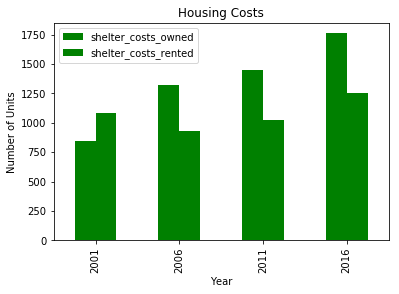

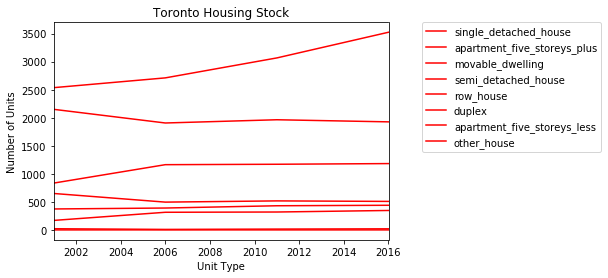

In [9]:
# Create a Title for the Dashboard
title = pn.Row("# TORONTO REAL ESTATE ANALYSIS")
welcome = pn.Row("# I hope you enjoy the analysis, I certainly didn't")
welcomecolumn = pn.Column(title, welcome)
firstrow = pn.Row(create_bar_chart(to_housing_costs, "Housing Costs", "Year", "Number of Units", "green"),
                  create_line_chart(mean_dwellings_yearly_summary, "Toronto Housing Stock", "Unit Type", "Number of Units", "red"))
firstcolumn = pn.Column("# Toronto Housing Costs & Toronto Housing Stock", firstrow)
secondcolumn = pn.Row(neighbourhood_map(valuesbylocation,"lat", "lon", "average_house_value"))
thirdcolumn = pn.Row("# Didn't have time to figure out a drop down", average_value_by_neighbourhood("Willowdale East"))
Tor_Real_Estate = pn.Tabs(
    ("Introductory", welcomecolumn),
    ("General Plots", firstcolumn),
    ("Map", secondcolumn),
    ("Neighbourhood Values", thirdcolumn)
)


#row_of_bar = pn.Row(num_foreclosures_plot)
#row_of_parallel = pn.Row(parallel_categories, parallel_coordinates)

#row_of_bar = pn.Row(num_foreclosures_plot)
#row_of_bar.append(num_sales_plot)
#plots_as_column = pn.Column("# Allegheny Real Estate Dashboard", row_of_parallel, row_of_bar)

# Define a welcome text
# YOUR CODE HERE!

# Create a tab layout for the dashboard
# YOUR CODE HERE!


# Create the main dashboard
# YOUR CODE HERE!

## Serve the Panel Dashboard

In [10]:
Tor_Real_Estate.servable()

Tabs
    [0] Column
        [0] Row
            [0] Markdown(str)
        [1] Row
            [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] Str(AxesSubplot)
            [1] Str(AxesSubplot)
    [2] Row
        [0] Str(None)
    [3] Row
        [0] Markdown(str)
        [1] DataFrame(Series)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [11]:
# neighbourhood_map().show()

In [12]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [13]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [14]:
# average_house_value()

In [15]:
# average_value_by_neighbourhood()

In [16]:
# number_dwelling_types()

In [17]:
# average_house_value_snapshot()

In [18]:
# top_most_expensive_neighbourhoods()

In [19]:
# sunburts_cost_analysis()